In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Load the data
df = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
df.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

It appears that the median trust did not decline for any one country.  However, there was higher variance in Germany in 2014.  Additionally, Spain and Sweden show significant differences in the means based on a t-test with a p-value of < .05.

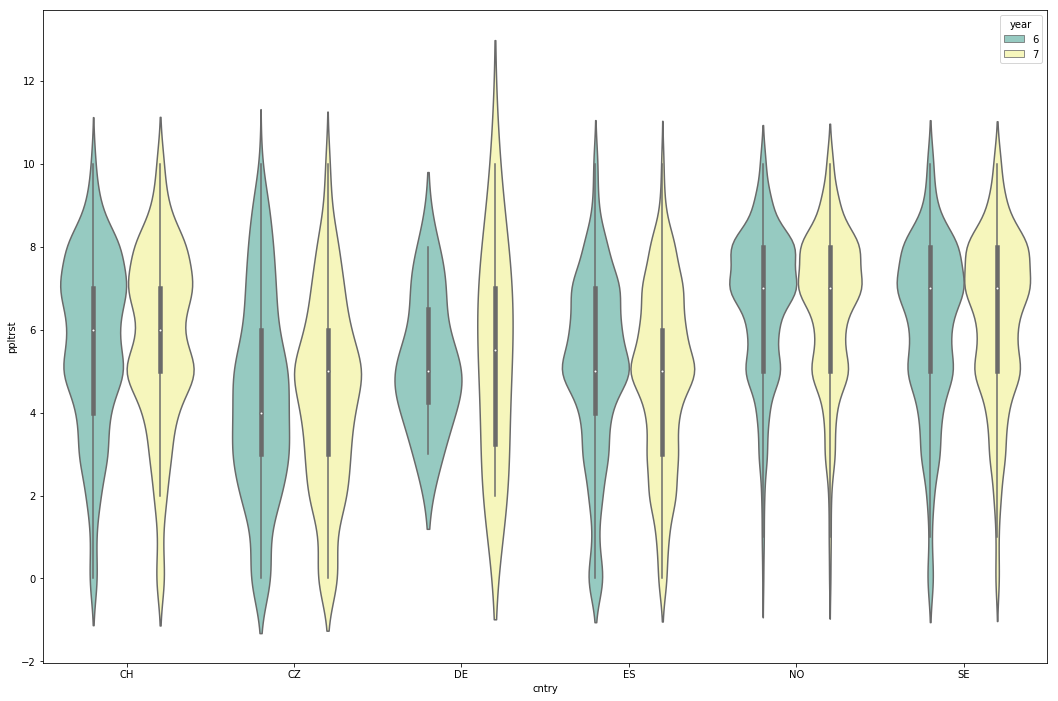

In [35]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.violinplot(x="cntry", y="ppltrst", hue="year",
                 data=df, palette="Set3")

Did people become happier from 2012 to 2014? Compute results for each country in the sample.

In [56]:
cntry = ['CH', 'CZ','DE','ES','NO','SE']
for c in cntry:
    print('{}:'.format(c))
    print(stats.ttest_ind(df.loc[(df['year']==6) & (df['cntry'] == c),['ppltrst']].dropna(), df.loc[(df['year']==7) & (df['cntry'] == c),['ppltrst']].dropna()))


CH:
Ttest_indResult(statistic=array([-0.67827166]), pvalue=array([0.4977011]))
CZ:
Ttest_indResult(statistic=array([-0.47654431]), pvalue=array([0.63376636]))
DE:
Ttest_indResult(statistic=array([-0.18084359]), pvalue=array([0.85789266]))
ES:
Ttest_indResult(statistic=array([2.49427652]), pvalue=array([0.0126876]))
NO:
Ttest_indResult(statistic=array([0.54376699]), pvalue=array([0.58668496]))
SE:
Ttest_indResult(statistic=array([-2.08916484]), pvalue=array([0.03683209]))


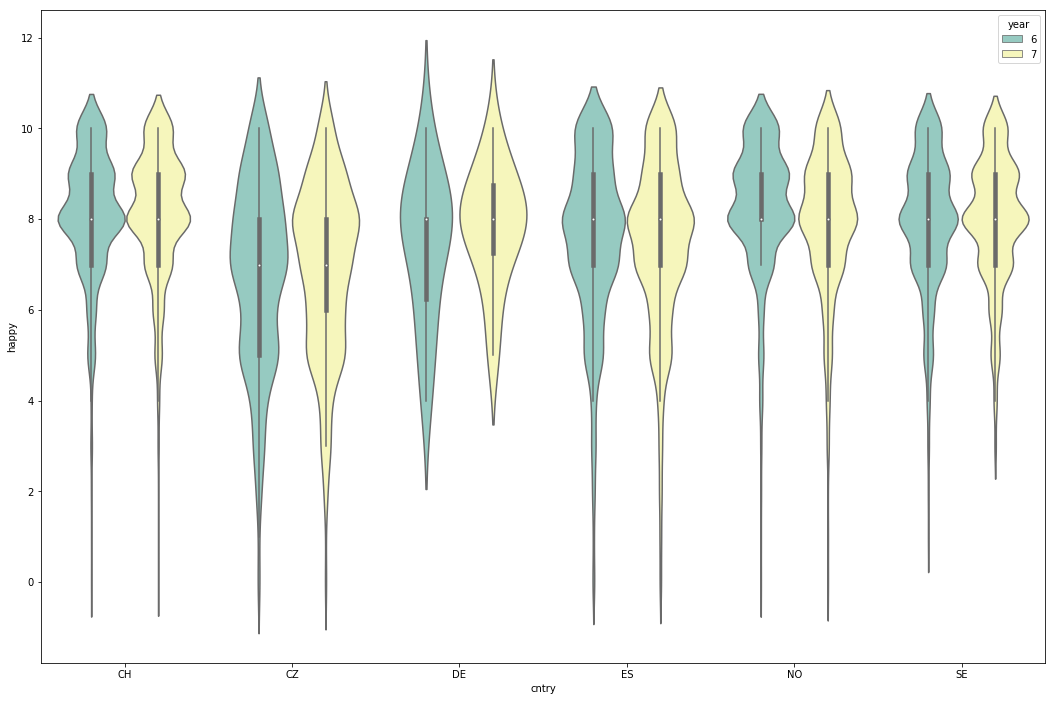

In [50]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.violinplot(x="cntry", y="happy", hue="year",
                 data=df, palette="Set3")

In [48]:
cntry = ['CH', 'CZ','DE','ES','NO','SE']
for c in cntry:
    print('{}:'.format(c))
    print(stats.ttest_ind(df.loc[(df['year']==6) & (df['cntry'] == c),['happy']].dropna(), df.loc[(df['year']==7) & (df['cntry'] == c),['happy']].dropna()))


CH:
Ttest_indResult(statistic=array([-0.38839167]), pvalue=array([0.69777986]))
CZ:
Ttest_indResult(statistic=array([-1.30337907]), pvalue=array([0.19267687]))
DE:
Ttest_indResult(statistic=array([-0.76485293]), pvalue=array([0.45124604]))
ES:
Ttest_indResult(statistic=array([1.67398451]), pvalue=array([0.09426276]))
NO:
Ttest_indResult(statistic=array([4.26539165]), pvalue=array([2.12412598e-05]))
SE:
Ttest_indResult(statistic=array([-0.57486854]), pvalue=array([0.56545165]))


In [68]:
cntry = ['DE','CH', 'CZ','DE','ES','NO','SE']
for c in cntry:
    print('{}:'.format(c))
    print(stats.wilcoxon(df.loc[(df['year']==6) & (df['cntry'] == c),['happy']].dropna(), df.loc[(df['year']==7) & (df['cntry'] == c),['happy']].dropna()))


DE:


ValueError: condition must be a 1-d array

In [70]:
df.loc[(df['year']==6) & (df['cntry'] == 'DE'),['happy']].dropna().shape
#df.loc[(df['year']==7) & (df['cntry'] == 'CH'),['happy']].shape

(14, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C14583B38>]],
      dtype=object)

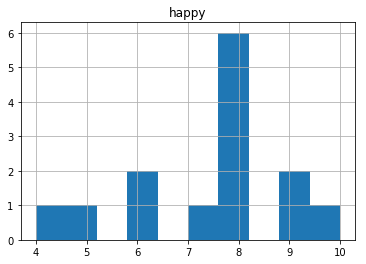

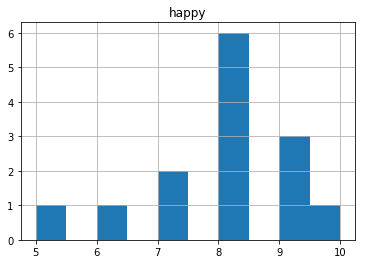

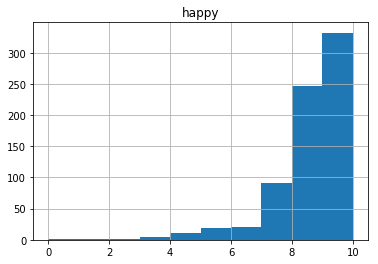

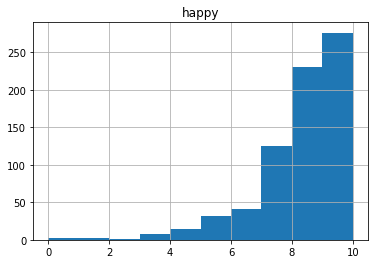

In [59]:
df.loc[(df['year']==6) & (df['cntry'] == 'DE'),['happy']].hist()
df.loc[(df['year']==7) & (df['cntry'] == 'DE'),['happy']].hist()

df.loc[(df['year']==6) & (df['cntry'] == 'NO'),['happy']].hist()
df.loc[(df['year']==7) & (df['cntry'] == 'NO'),['happy']].hist()


Who reported watching more TV in 2012, men or women?

Women appear to have a distribution slightly skewed towards more TV watching.

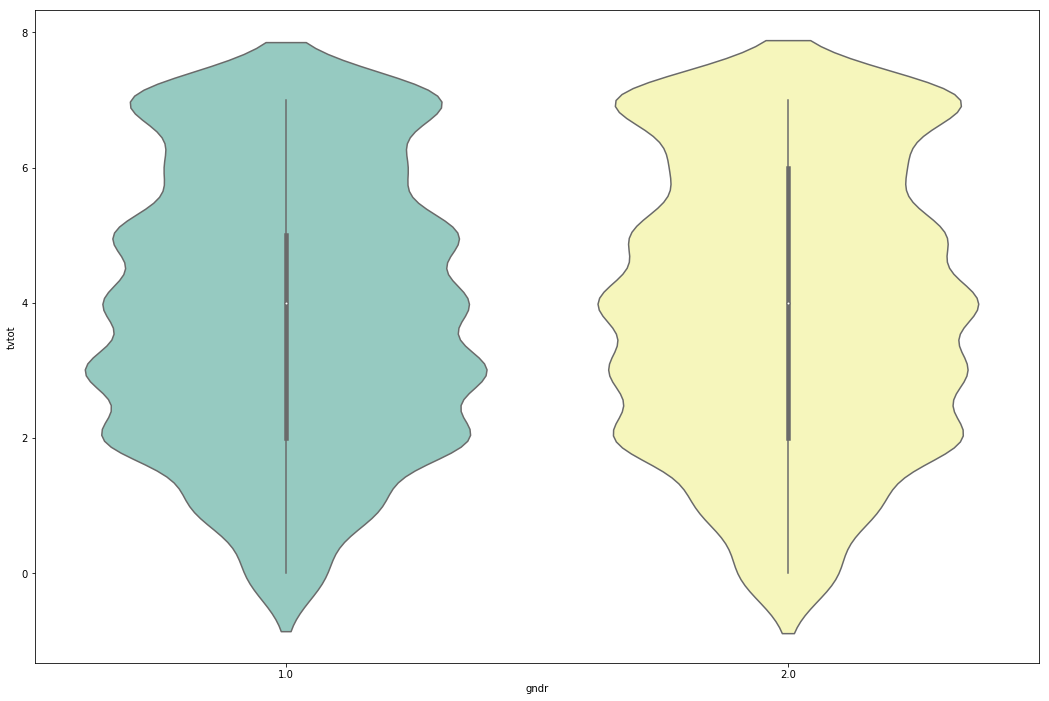

In [75]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.violinplot(x="gndr", y="tvtot",
                 data= df.loc[(df['year']==6)], palette="Set3")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028C1474A2E8>]],
      dtype=object)

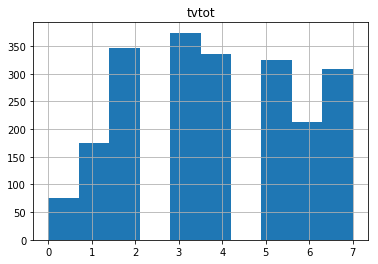

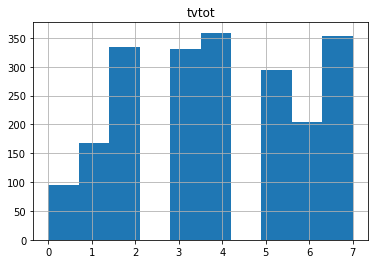

In [74]:
df.loc[(df['year']==6) & (df['gndr'] == 1),['tvtot']].hist()
df.loc[(df['year']==6) & (df['gndr'] == 2),['tvtot']].hist()

Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

People living with a partner (1) were more likely to believe people were fair.

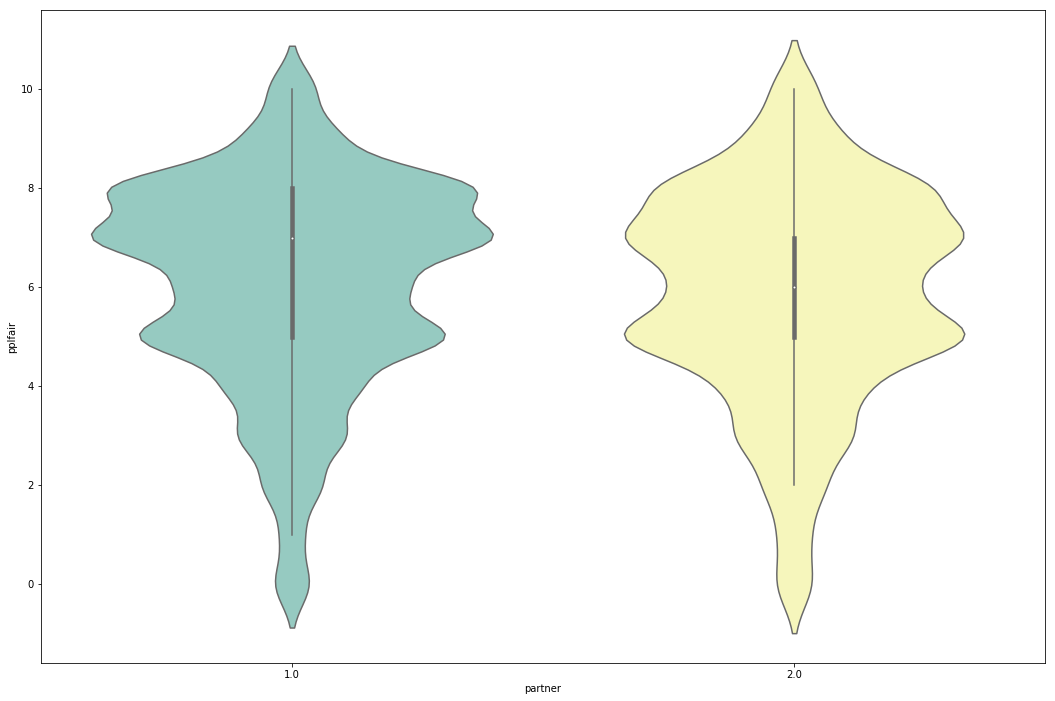

In [77]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.violinplot(x="partner", y="pplfair",
                 data= df.loc[(df['year']==6)], palette="Set3")

Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Germany stands out as having the least variance in the distribution. Both Germany and the Czech Republic both have medians of 4, while the other countries hae medians of 6.  Sweden, unlike the other 3 countries with a median of 6, has a higher 75th percentile, meaning it has about half its respondents responding with a 6 or 7 (the highest score among all countries).

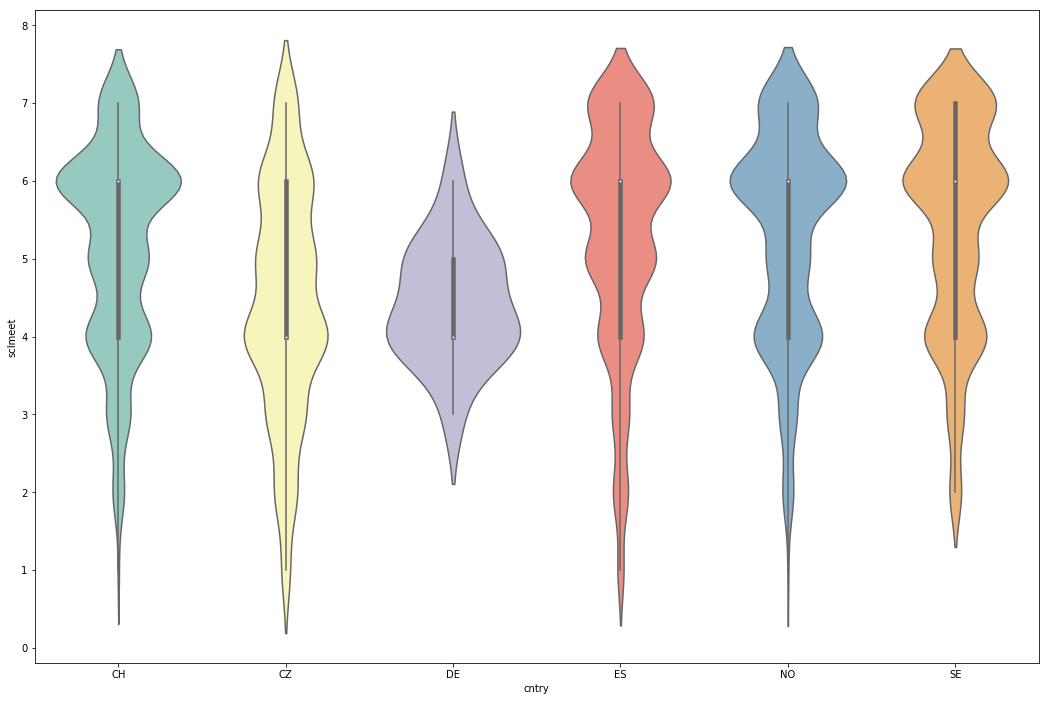

In [80]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.violinplot(x="cntry", y="sclmeet",
                 data= df.loc[(df['year']==7)], palette="Set3")

Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?


Question for David:  How to do this with so many ages?

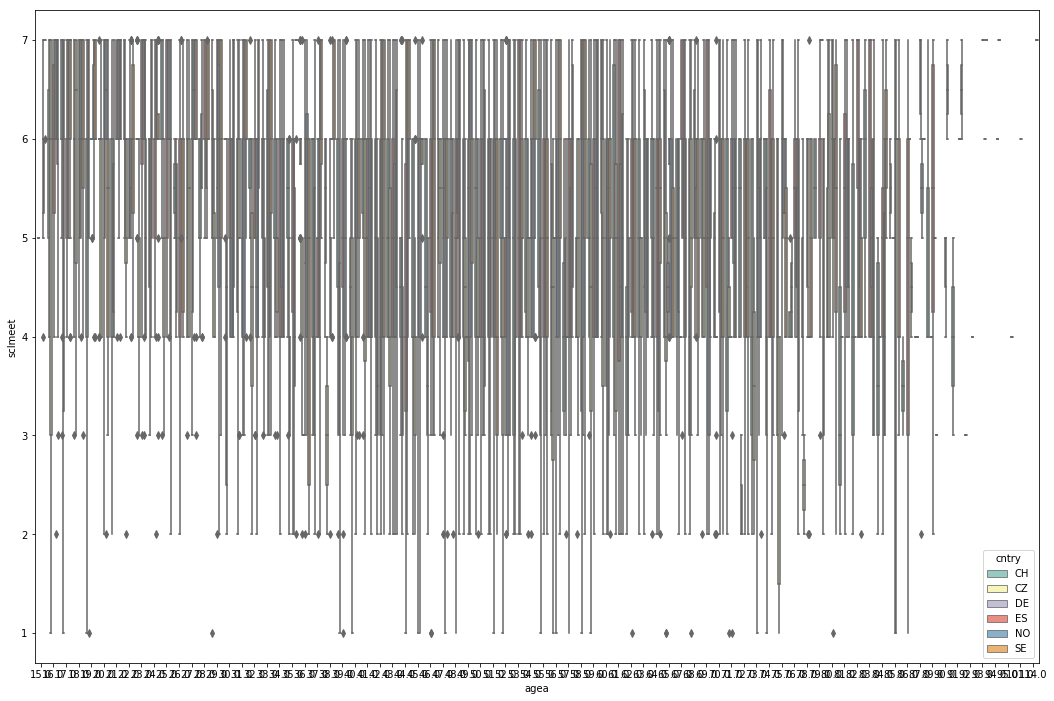

In [90]:
fig = plt.figure(figsize=(18,12))
fig.add_subplot(1,1,1)
ax = sns.boxplot(x="agea", y="sclmeet",hue="cntry",
                 data= df.loc[(df['year']==7)], palette="Set3")

In [86]:
x_2012 = df.loc[(df['year']==7) & (df['cntry'] =='SE'),['cntry','sclmeet']].sort_values('sclmeet')
#x_2014 = df.loc[df['year']==7,['cntry','ppltrst']]
x_2012.tail(500)         

,cntry,sclmeet
8232,SE,6.0
8477,SE,6.0
8476,SE,6.0
7800,SE,6.0
8266,SE,6.0
8268,SE,6.0
8245,SE,6.0
8265,SE,6.0
7779,SE,6.0
8484,SE,6.0


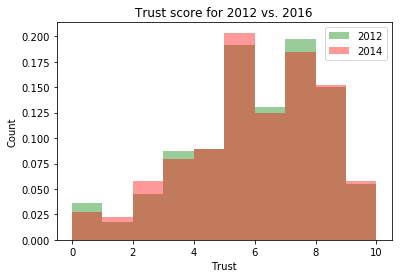

In [29]:
plt.hist(x_2012.dropna(), color = 'green', alpha=.4, density = 'yes', label='2012')
plt.hist(x_2014.dropna(), color = 'red', alpha=.4, density = 'yes', label = '2014') 
plt.ylabel('Count')
plt.xlabel('Trust')
plt.title('Trust score for 2012 vs. 2016')
plt.legend()
# Set the formatter
#formatter = FuncFormatter(to_percent)
#plt.gca().yaxis.set_major_formatter(formatter)